<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("js")

js


# Importing all required Libraries

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [5]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [6]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [7]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [8]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [9]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7fc7ee5a1d00>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

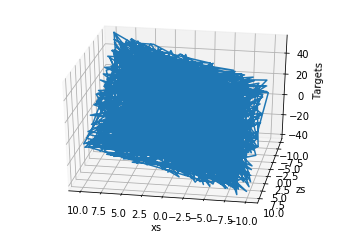

In [10]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [11]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[ 0.05752863]
 [-0.02950598]]
Biases :  [0.01627539]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [13]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  229.0081462422514
losss :  33.24939827599601
losss :  13.639232960270787
losss :  11.309724931259607
losss :  10.69186857133077
losss :  10.25755659901013
losss :  9.856085990569895
losss :  9.472052333936219
losss :  9.103376840714182
losss :  8.74931457472632
losss :  8.409273408969302
losss :  8.082696824739017
losss :  7.76905154023601
losss :  7.467825508400965
losss :  7.17852696917512
losss :  6.900683635632022
losss :  6.633841921863182
losss :  6.377566202379772
losss :  6.131438100932839
losss :  5.895055807502982
losss :  5.668033422335778
losss :  5.450000325951166
losss :  5.2406005740982895
losss :  5.0394923166679675
losss :  4.8463472396142135
losss :  4.660850028973696
losss :  4.482697856108129
losss :  4.311599883329293
losss :  4.147276789099514
losss :  3.989460312032587
losss :  3.8378928129506362
losss :  3.69232685428198
losss :  3.5525247961133695
losss :  3.4182584082371568
losss :  3.2893084975599924
losss :  3.1654645502648644
losss :  3.04652438814

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [14]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 2.00073834]
 [-2.99957518]]  biases :  [4.98807601]


Plot last output vs target

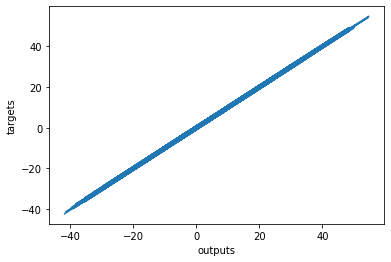

In [15]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

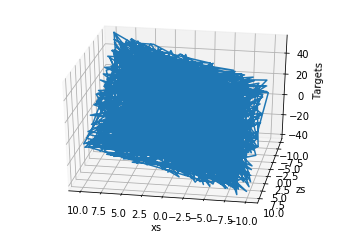

In [16]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [20]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 35.8954
Epoch 2/100
1000/1000 - 0s - loss: 4.5928
Epoch 3/100
1000/1000 - 0s - loss: 1.5509
Epoch 4/100
1000/1000 - 0s - loss: 0.6861
Epoch 5/100
1000/1000 - 0s - loss: 0.4516
Epoch 6/100
1000/1000 - 0s - loss: 0.3830
Epoch 7/100
1000/1000 - 0s - loss: 0.3674
Epoch 8/100
1000/1000 - 0s - loss: 0.3628
Epoch 9/100
1000/1000 - 0s - loss: 0.3625
Epoch 10/100
1000/1000 - 0s - loss: 0.3671
Epoch 11/100
1000/1000 - 0s - loss: 0.3625
Epoch 12/100
1000/1000 - 0s - loss: 0.3598
Epoch 13/100
1000/1000 - 0s - loss: 0.3578
Epoch 14/100
1000/1000 - 0s - loss: 0.3556
Epoch 15/100
1000/1000 - 0s - loss: 0.3629
Epoch 16/100
1000/1000 - 0s - loss: 0.3494
Epoch 17/100
1000/1000 - 0s - loss: 0.3598
Epoch 18/100
1000/1000 - 0s - loss: 0.3529
Epoch 19/100
1000/1000 - 0s - loss: 0.3560
Epoch 20/100
1000/1000 - 0s - loss: 0.3559
Epoch 21/100
1000/1000 - 0s - loss: 0.3567
Epoch 22/100
1000/1000 - 0s - loss: 0.3540
Epoch 23/100
1000/1000 - 0s - loss: 0.36

In [21]:
model.layers[0].get_weights()

[array([[ 2.00512  ],
        [-2.9795308]], dtype=float32), array([4.9663234], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.00512  ],
       [-2.9795308]], dtype=float32)

In [23]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9663234], dtype=float32)

Extract the outputs (make predictions)

In [24]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-6.95136690e+00],
       [-9.58285713e+00],
       [ 3.66081190e+00],
       [-6.76555586e+00],
       [-6.13346243e+00],
       [ 3.23900719e+01],
       [ 1.73884411e+01],
       [-3.27781439e+00],
       [-2.36911392e+01],
       [ 2.10970421e+01],
       [-2.33044243e+01],
       [ 1.58542299e+00],
       [ 2.36522102e+01],
       [ 1.86367302e+01],
       [-6.91223145e-02],
       [ 1.69487686e+01],
       [-4.45933867e+00],
       [ 3.12401657e+01],
       [ 4.92640228e+01],
       [ 7.82997751e+00],
       [-1.33221531e+00],
       [-2.38176107e+00],
       [ 1.03244209e+00],
       [ 1.10978069e+01],
       [ 5.79890728e-01],
       [-7.99944162e+00],
       [-1.65004997e+01],
       [ 2.35256119e+01],
       [-1.39266052e+01],
       [-4.24305773e+00],
       [-1.00039253e+01],
       [ 2.10363998e+01],
       [-3.66569214e+01],
       [ 4.19071045e+01],
       [-3.03042221e+01],
       [ 3.14222450e+01],
       [-5.45

In [25]:
training_data['targets'].round(1)

array([[ -6.7],
       [-10.5],
       [  4.1],
       [ -7.6],
       [ -5.3],
       [ 31.9],
       [ 18.2],
       [ -2.5],
       [-23.3],
       [ 20.3],
       [-23.1],
       [  1.8],
       [ 23.1],
       [ 19.2],
       [  0.8],
       [ 17.3],
       [ -4. ],
       [ 30.8],
       [ 50.3],
       [  8. ],
       [ -2.1],
       [ -1.6],
       [  0.7],
       [ 10.5],
       [  0.1],
       [ -8.8],
       [-17.3],
       [ 23.6],
       [-12.9],
       [ -3.6],
       [-10. ],
       [ 22.1],
       [-37.6],
       [ 41.8],
       [-30.4],
       [ 31.7],
       [ -4.8],
       [ -2. ],
       [ -2.2],
       [ 17.1],
       [-12.7],
       [-13.8],
       [ 29.4],
       [-28.6],
       [  5.2],
       [-18.7],
       [  8.6],
       [ -2.1],
       [ 16.4],
       [-22.3],
       [ 30.1],
       [ -4.7],
       [  5.5],
       [ 12.7],
       [  9.7],
       [ 36.4],
       [ 24.6],
       [ -8.9],
       [  0.2],
       [ 40.3],
       [-18.2],
       [ -1.6],
       [

Plotting the data

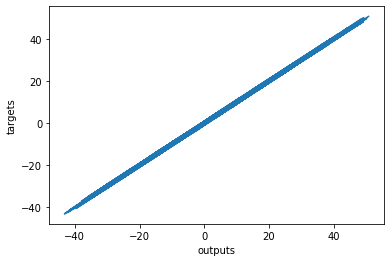

In [26]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 12 - The MNIST example

Import the relavent packages

In [27]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print("Import done")

Import done


Data

In [28]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


Training, Test and Validation datasets

In [29]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Transforming the values
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

# scale whole train data and store it in a variable
scaled_train_and_validation_data = mnist_train.map(scale)

# scale whole test data 
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
# validation_inputs, validation_targets = next(iter(validation_data))

print("done")


done


Model - Outline the model

In [30]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size,activation='softmax')
])

print("done")

done


Choose the optimizer and the loss function

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("done")

done


Training

In [32]:

NUM_EPOCHS = 5

model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose =2, validation_steps=10)

Epoch 1/5
540/540 - 10s - loss: 0.4263 - accuracy: 0.8765 - val_loss: 0.2239 - val_accuracy: 0.9367
Epoch 2/5
540/540 - 10s - loss: 0.1854 - accuracy: 0.9458 - val_loss: 0.1647 - val_accuracy: 0.9525
Epoch 3/5
540/540 - 10s - loss: 0.1425 - accuracy: 0.9579 - val_loss: 0.1338 - val_accuracy: 0.9615
Epoch 4/5
540/540 - 10s - loss: 0.1185 - accuracy: 0.9648 - val_loss: 0.1208 - val_accuracy: 0.9658
Epoch 5/5
540/540 - 10s - loss: 0.0983 - accuracy: 0.9711 - val_loss: 0.1098 - val_accuracy: 0.9723


Test the Model

In [33]:
test_loss, test_accuracy = model.evaluate(test_data)

      1/Unknown - 1s 1s/step - loss: 0.1160 - accuracy: 0.9645

In [34]:
print("Test loss : ", test_loss)
print("Test accuracy : ", test_accuracy) 

Test loss :  0.11602358520030975
Test accuracy :  0.9645


## Seciton 13 - Business case

Extract the data from the csv

In [60]:
import numpy as np
from sklearn import preprocessing

raw_csv_data = np.loadtxt('Audiobooks-data.csv', delimiter=',')

unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1]

print("Import done")

Import done


In [49]:
raw_csv_data[0:3]

array([[8.730e+02, 2.160e+03, 2.160e+03, 1.013e+01, 1.013e+01, 0.000e+00,
        8.910e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [6.110e+02, 1.404e+03, 2.808e+03, 6.660e+00, 1.333e+01, 1.000e+00,
        6.500e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.820e+02, 1.000e+00],
       [7.050e+02, 3.240e+02, 3.240e+02, 1.013e+01, 1.013e+01, 1.000e+00,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.340e+02, 1.000e+00]])

In [50]:
unscaled_input_all[0:3]

array([[2.160e+03, 2.160e+03, 1.013e+01, 1.013e+01, 0.000e+00, 8.910e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.404e+03, 2.808e+03, 6.660e+00, 1.333e+01, 1.000e+00, 6.500e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.820e+02],
       [3.240e+02, 3.240e+02, 1.013e+01, 1.013e+01, 1.000e+00, 9.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.340e+02]])

In [51]:
target_all[0:3]

array([1., 1., 1.])

Balance the dataset

In [61]:
num_one_targets = int(np.sum(target_all))
print("Total : ", num_one_targets)
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
  if targets_all[i] == 0:
    zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
      indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)


Total :  2237


Standardized the inputs

In [62]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)
print("Standardization is in place")

Standardization is in place


Shuffle the data

In [65]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

print("Shuffle is in place")

Shuffle is in place


Split the dataset into Train, Validation and Test

In [78]:
sample_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*sample_count)
validation_samples_count = int(0.1*sample_count)
test_samples_count = sample_count - train_samples_count - validation_samples_count

print("Train sample count : ", train_samples_count)
print("Validaiotn  count : ", validation_samples_count)
print("Test count : ", test_samples_count)

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)


Train sample count :  3579
Validaiotn  count :  447
Test count :  448
1808.0 3579 0.5051690416317407
211.0 447 0.4720357941834452
218.0 448 0.48660714285714285


Save the three datasets in *.npz

In [0]:

np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

*** Create the machine leanring alogorithm

Import the relevant libraries

In [82]:
import numpy as np
import tensorflow as tf
print("import done")

import done


Data

In [84]:
npz = np.load('Audiobooks_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_validation.npz')
validation_inputs = npz['inputs'].astype(np.float)
validation_targets = npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_test.npz')
test_inputs = npz['inputs'].astype(np.float)
test_targets = npz['targets'].astype(np.int)

print("Data - done")

Data - done


Model

In [0]:

input_size = 10
output_size = 2

model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size = 100

max_epochs = 100

model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

In [86]:

input_size = 10
output_size = 2

hidden_layer_size = 50
    

model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


batch_size = 100

max_epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Train on 3579 samples, validate on 447 samples
Epoch 1/100
3579/3579 - 0s - loss: 0.5059 - accuracy: 0.8050 - val_loss: 0.4136 - val_accuracy: 0.8412
Epoch 2/100
3579/3579 - 0s - loss: 0.3468 - accuracy: 0.8773 - val_loss: 0.3602 - val_accuracy: 0.8568
Epoch 3/100
3579/3579 - 0s - loss: 0.3094 - accuracy: 0.8868 - val_loss: 0.3368 - val_accuracy: 0.8613
Epoch 4/100
3579/3579 - 0s - loss: 0.2915 - accuracy: 0.8947 - val_loss: 0.3187 - val_accuracy: 0.8680
Epoch 5/100
3579/3579 - 0s - loss: 0.2803 - accuracy: 0.8952 - val_loss: 0.3059 - val_accuracy: 0.8702
Epoch 6/100
3579/3579 - 0s - loss: 0.2711 - accuracy: 0.9003 - val_loss: 0.3016 - val_accuracy: 0.8725
Epoch 7/100
3579/3579 - 0s - loss: 0.2638 - accuracy: 0.9028 - val_loss: 0.2932 - val_accuracy: 0.8747
Epoch 8/100
3579/3579 - 0s - loss: 0.2601 - accuracy: 0.9042 - val_loss: 0.2884 - val_accuracy: 0.8814
Epoch 9/100
3579/3579 - 0s - loss: 0.2564 - accuracy: 0.9047 - val_loss: 0.2857 - val_accuracy: 0.8837
Epoch 10/100
3579/3579 - 0

Test the model

In [87]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

448/448 [==============================] - 0s 189us/sample - loss: 0.2133 - accuracy: 0.9219


In [88]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.21. Test accuracy: 92.19%


## Section 14 : Linear Algebra

Import the relevant libraries

In [0]:
import numpy as np

Scalars

In [2]:
s = 5
print("s is : ", s)

s is :  5


Vectors

In [3]:
v = np.array([5,-2,3])
print("Vector is : ", v)

Vector is :  [ 5 -2  3]


Martices

In [4]:
m = np.array([[4,5],[9,4]])
print("Matrix : ", m)

Matrix :  [[4 5]
 [9 4]]


Data type

In [5]:
type(s)

int

In [6]:
type(v)

numpy.ndarray